## A. Movimiento de un cometa

Existen muchos cometas que orbitan alrededor del Sol con trayectorias elípticas. De acuerdo con las leyes de Kepler, cuando el cometa se encuentra lejos del centro de fuerza, su movimiento es lento, mientras que al acercarce al Sol su velocidad es bastante grande. Este es un sistema físico que claramentte debería ser solucionado con un método de paso adaptivo: en la región lejana se pueden utilizar pasos grandes mientras que en la región cercana se necesitan pasos muy cortos para tener un error pequeño.

Utilizando coordenadas cartesianas en el plano de movimiento, la dinámica del cometa bajo la influencia Solar está descrito por las ecuaciones

$$\frac{d^2x}{dt^2}=-GM\frac{x}{r^3}$$
$$\frac{d^2y}{dt^2}=-GM\frac{y}{r^3}$$

donde $r=\sqrt{x^2+y^2}$, $G$ es la constante gravitacional de Newton y $M$ es la masa del Sol.

1. Escriba un programa para solucionar estas ecuaciones utilizando el método Runge-Kutta de orden 4 con paso fijo. Elija adecuadamente el sistema de unidades y escriba correspondientemente los valores de $M$ y $G$. Como condición inicial, suponga que en $t=0$ el cometa se encuentra en las coordenadas

$$\left \{ \begin{align}
    &x=4\times10^9\,km\\
    &y=0\,km
    \end{align} \right.$$
    
y se mueve con la velocidad

$$\left\{\begin{align}
    &v_x=0\,m/s\\
    &v_y=500\,m/s
    \end{align} \right.$$
    
Implemente una función que calcule las cantidades conservadas del problema (energía y momento angular) para cada paso temporal. Escoja un tamaño de paso $\Delta t$ apropiado para poder calcular al menos 5 orbitas completas del cometa. Grafique la trayectoria y compruebe que duante las 5 orbitas se mantiene igual. Grafique el comportamiento de las cantidades conservadas en función del tiempo y verifique se valor durante toda la trayectoia obtenida

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def ODE(t, I, G=4*np.pi**2, M=1):
    r = np.sqrt(I[0]**2+I[1]**2)
    dxdt = I[2]
    dydt = I[3]
    dvxdt = -G*M*I[0]/(r**3)
    dvydt = -G*M*I[1]/(r**3)
    return np.array([dxdt,dydt,dvxdt,dvydt])

def RK4(ODE, t0, q0, tf, n):
    dt = (tf - t0)/n
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0

    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        k1 = dt*ODE(q[i-1,0], q[i-1,1:])
        k2 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k1/2)
        k3 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k2/2)
        k4 = dt*ODE(q[i-1,0] + dt, q[i-1,1:] + k3)
        q[i,1:] = q[i-1,1:] + (k1 + 2*k2 + 2*k3 + k4)/6

    return q

# Initial Conditions
#I_0 = np.array([4e12,0,0,500])
#I_0 = np.array([1,0,0,3])
I_0 = np.array([26.74,0,0,0.105])

# Creation of the grid
t_0 = 0.
t_f = 250.
n=1000000
dt = (t_f - t_0)/n

I = RK4(ODE, t_0, I_0, t_f, n)

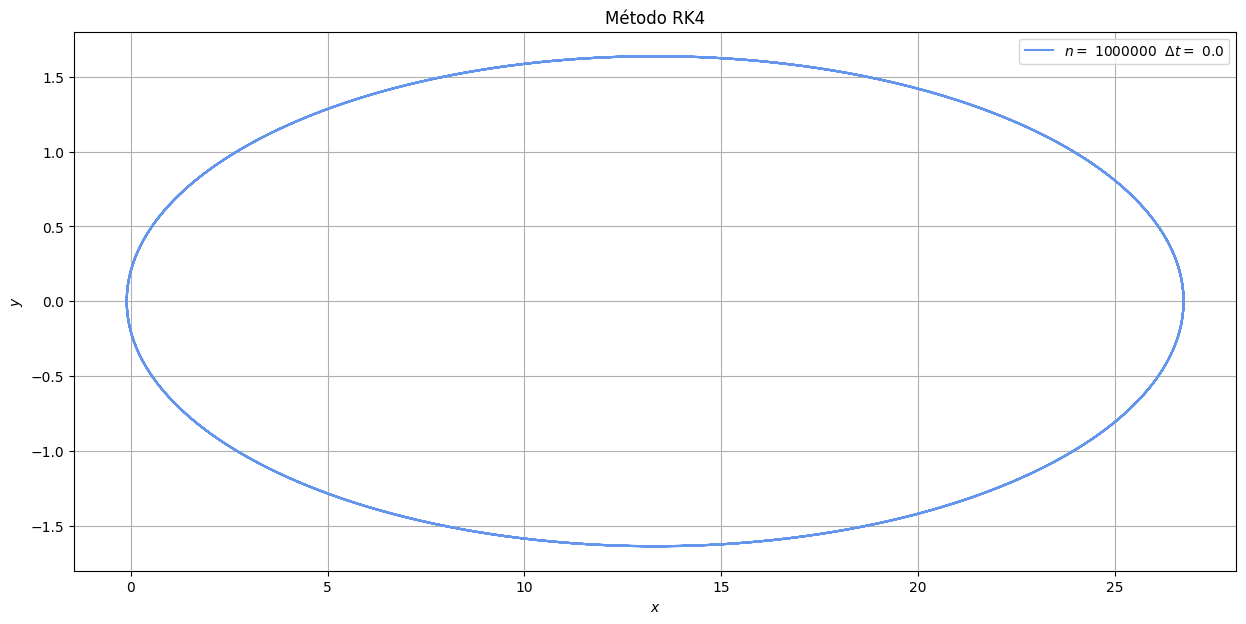

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(I[:,1], I[:,2], color='cornflowerblue', label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}')
ax.set_title('Método RK4')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

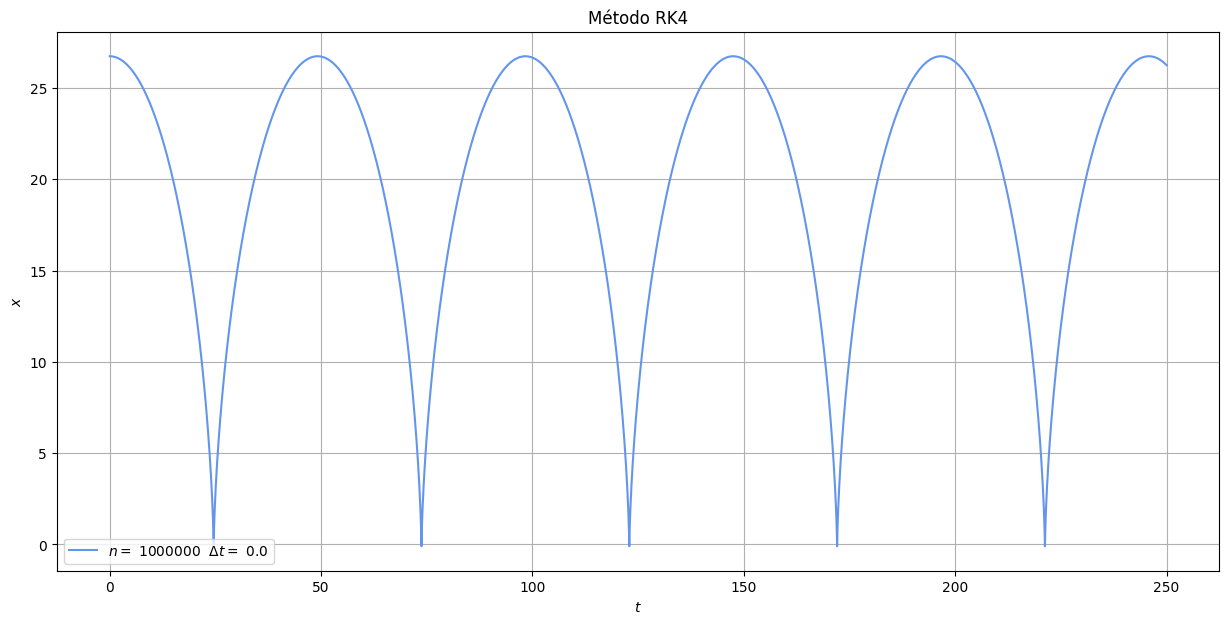

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(I[:,0], I[:,1], color='cornflowerblue', label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}')
ax.set_title('Método RK4')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
plt.legend()
plt.grid()
plt.show()

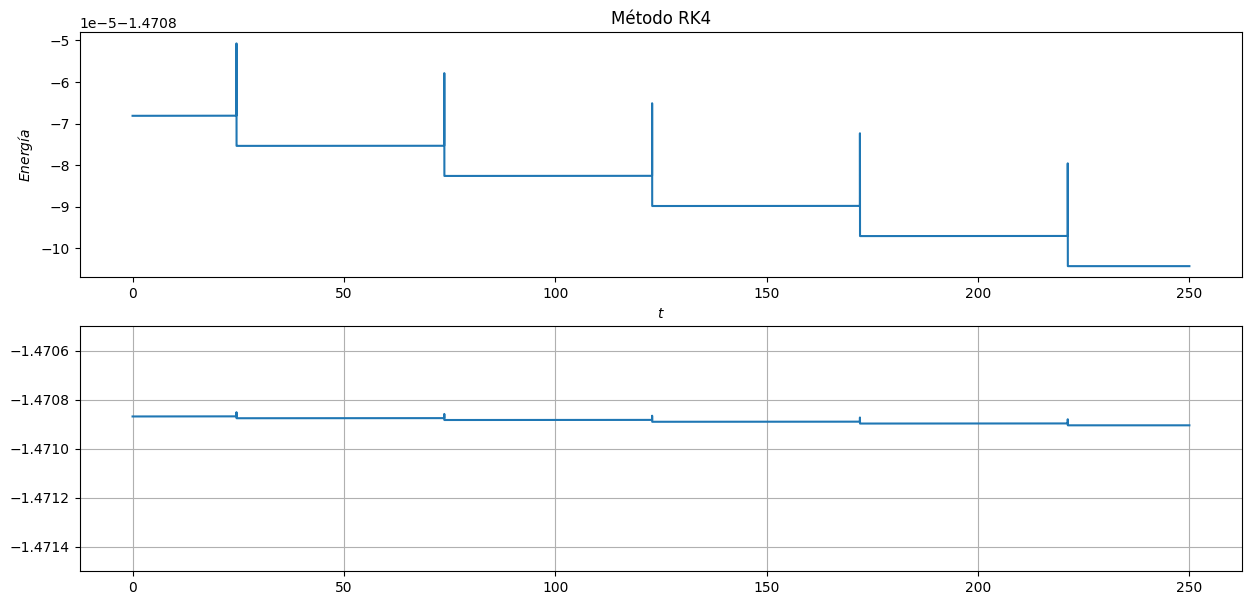

In [ ]:
#Energía

def energia (x,y,v_x,v_y):
  G=4*np.pi**2
  r = np.sqrt(x**2+y**2)
  return 0.5*(v_x**2+v_y**2) - G/r



fig, ax = plt.subplots(2,figsize=(15,7))
ax[0].plot(I[:,0], energia(I[:,1],I[:,2],I[:,3],I[:,4]), label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}')
ax[0].set_title('Método RK4')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Energía$')
ax[1].plot(I[:,0], energia(I[:,1],I[:,2],I[:,3],I[:,4]), label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}'); ax[1].set_ylim(-1.4715, -1.4705)
plt.grid()
plt.show()

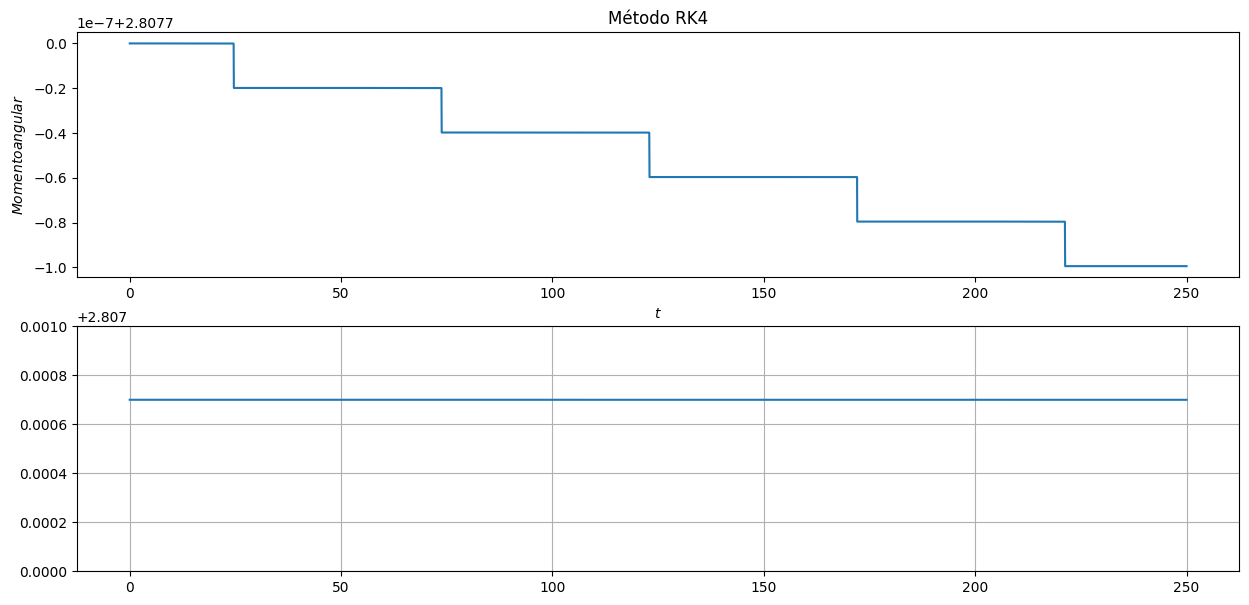

In [ ]:
#Momento angular

def momento_a (x,y,v_x,v_y):
  return x*v_y - y*v_x



fig, ax = plt.subplots(2,figsize=(15,7))
ax[0].plot(I[:,0], momento_a(I[:,1],I[:,2],I[:,3],I[:,4]), label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}')
ax[0].set_title('Método RK4')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Momento angular$')
ax[1].plot(I[:,0], momento_a(I[:,1],I[:,2],I[:,3],I[:,4]), label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}'); ax[1].set_ylim(2.807, 2.808)
plt.grid()
plt.show()

#Método adaptativo

In [71]:
#Runge kutta adaptativo

def ODE(t, I, G=4*np.pi**2, M=1):
    r = np.sqrt(I[0]**2+I[1]**2)
    dxdt = I[2]
    dydt = I[3]
    dvxdt = -G*M*I[0]/(r**3)
    dvydt = -G*M*I[1]/(r**3)
    return np.array([dxdt,dydt,dvxdt,dvydt])

def RK4_adaptativo(ODE, t0, q0, tf, n):
    dt = (tf - t0)/n
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0

    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        k1 = dt*ODE(q[i-1,0], q[i-1,1:])
        k2 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k1/2)
        k3 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k2/2)


        #Los dos resultados
        y_1 = q[i-1,1:] + (2/9)*k1 + (1/3)*k2 + (4/9)*k3

        k4 = dt*ODE(q[i-1,0] + dt, y_1)

        y_2 = q[i-1,1:] + (7/24)*k1 + (1/4)*k2 + (1/3)*k3 + (1/8)*k4
        #q[i,1:] = q[i-1,1:] + (k1 + 2*k2 + 2*k3 + k4)/6

        tol = 1e-7
        delta_y = np.linalg.norm(y_2 - y_1)/tf
        tf_new = dt * (np.abs(tol /delta_y )**(1/4)) * 0.9

        if delta_y <= tol:
            q[i,0] = q[i-1,0] + dt
            q[i,1:] = y_2


        if tf_new > tf:
            q[i,0] = q[i-1,0] + dt
        else:
            q[i,0] = q[i-1,0] + tf_new


    return q

In [ ]:
# Initial Conditions

Ia_0 = np.array([26.74,0,0,0.105])

# Creation of the grid
t_0 = 0.
t_f = 2500.
n= 1000000
dt = (t_f - t_0)/n

Ia = RK4_adaptativo(ODE, t_0, Ia_0, t_f, n)



<ipython-input-71-23735de1c067>:7: RuntimeWarning: invalid value encountered in double_scalars
  dvxdt = -G*M*I[0]/(r**3)
<ipython-input-71-23735de1c067>:8: RuntimeWarning: invalid value encountered in double_scalars
  dvydt = -G*M*I[1]/(r**3)


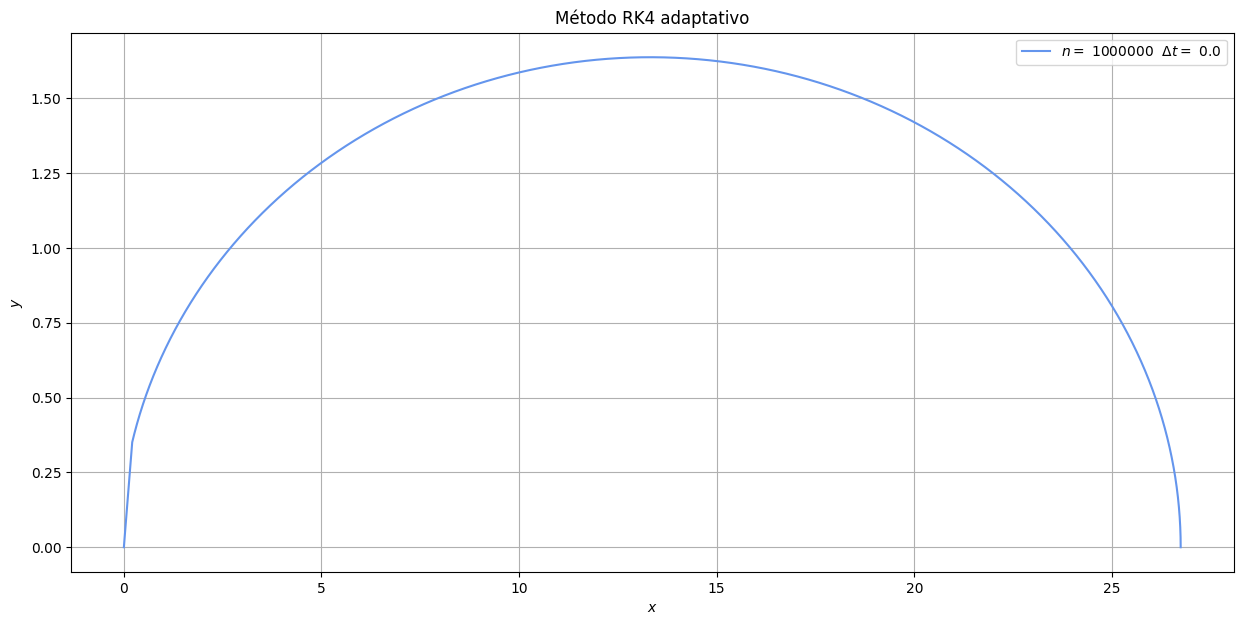

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(Ia[:,1], Ia[:,2], color='cornflowerblue', label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}')
ax.set_title('Método RK4 adaptativo')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

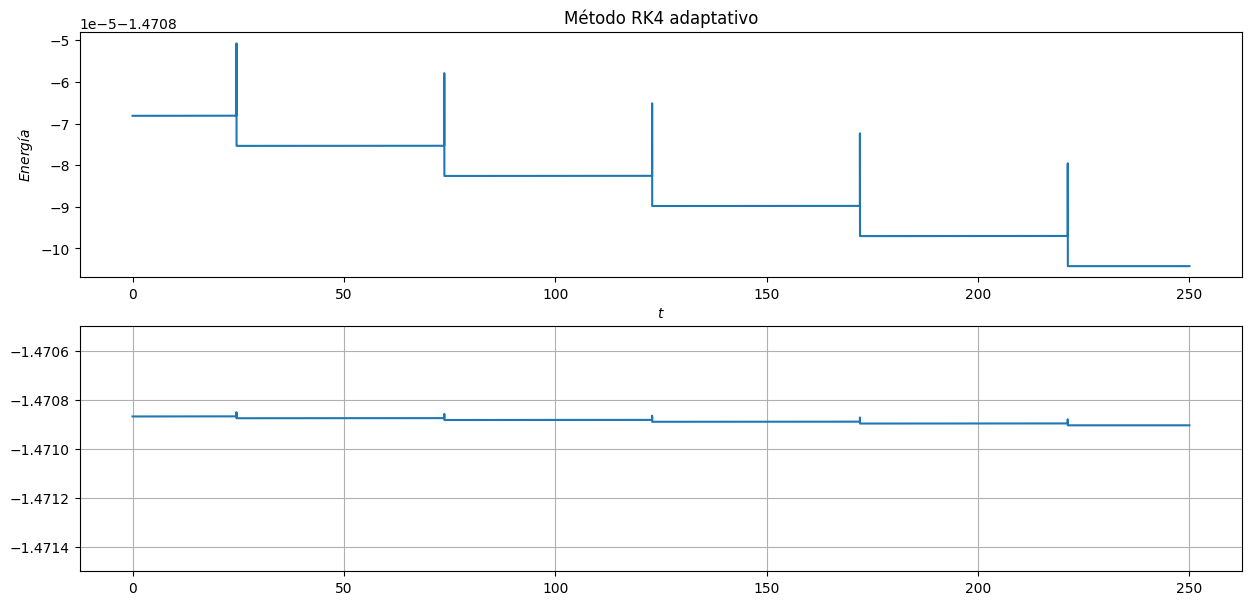

In [74]:
#Energía

def energia (x,y,v_x,v_y):
  G=4*np.pi**2
  r = np.sqrt(x**2+y**2)
  return 0.5*(v_x**2+v_y**2) - G/r



fig, ax = plt.subplots(2,figsize=(15,7))
ax[0].plot(I[:,0], energia(I[:,1],I[:,2],I[:,3],I[:,4]), label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}')
ax[0].set_title('Método RK4 adaptativo')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$Energía$')
ax[1].plot(I[:,0], energia(I[:,1],I[:,2],I[:,3],I[:,4]), label=f'$n=$ {n:.0f}  $\Delta t=$ {dt:.1f}'); ax[1].set_ylim(-1.4715, -1.4705)
plt.grid()
plt.show()

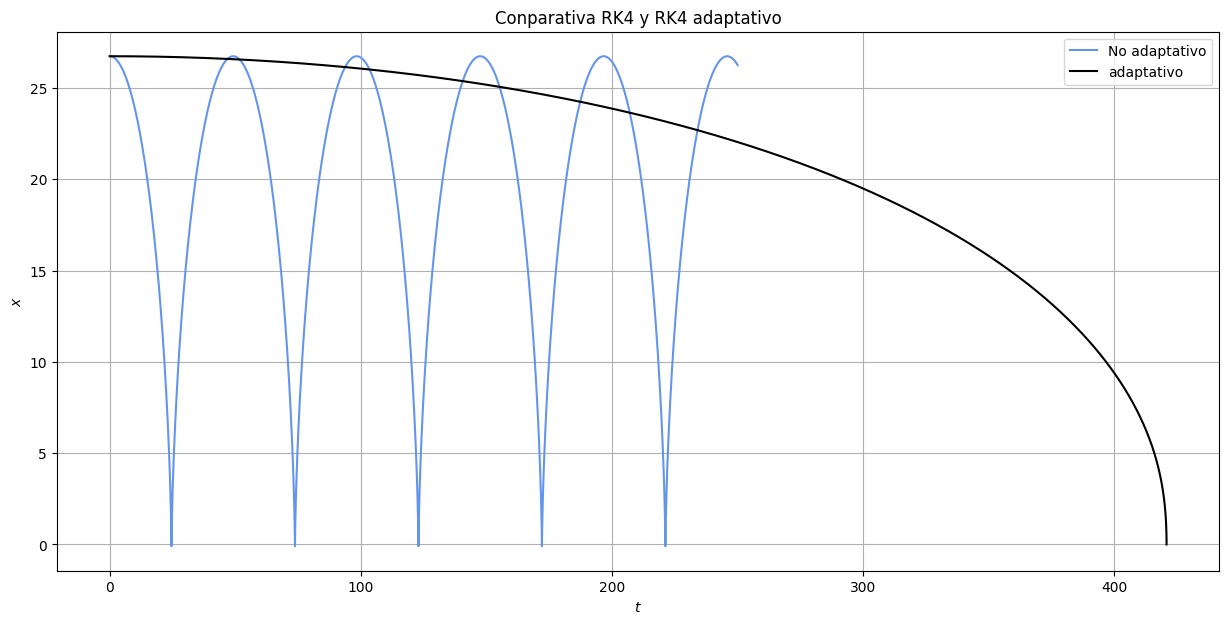

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(I[:,0], I[:,1], color='cornflowerblue', label='No adaptativo')
ax.set_title('Conparativa RK4 y RK4 adaptativo')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.plot(Ia[:,0], Ia[:,1], color='k', label='adaptativo')
plt.legend()
plt.grid()
plt.show()